# Predicción de Géneros Cinematográficos Usando Datos de IMDb

**Objetivo**: Este proyecto analiza y predice qué géneros cinematográficos serán rentables en el futuro usando datos de IMDb.

## Cargar y Filtrar Datos

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

# Opcional: Configuración de visualización
sns.set_style('darkgrid')
    

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Paso 1: Cargar y Filtrar Datos

In [3]:

# Cargar y filtrar datos iniciales
df_basics = pd.read_csv('ImdbTitleBasics.csv', low_memory=False)
df_movies = df_basics[df_basics['titleType'] == 'movie']

# Filtrar datasets adicionales según tconst
movie_ids = df_movies['tconst']
df_akas = pd.read_csv('ImdbTitleAkas.csv', low_memory=False)
df_akas_movies = df_akas[df_akas['titleId'].isin(movie_ids)]
df_crew_movies = pd.read_csv('ImdbTitleCrew.csv').query("tconst in @movie_ids")
df_principals_movies = pd.read_csv('ImdbTitlePrincipals.csv').query("tconst in @movie_ids")
df_ratings_movies = pd.read_csv('ImdbTitleRatings.csv').query("tconst in @movie_ids")

# Guardar archivos
df_movies.to_csv('ImdbTitleBasics_movies.csv', index=False)
df_akas_movies.to_csv('ImdbTitleAkas_movies.csv', index=False)
df_crew_movies.to_csv('ImdbTitleCrew_movies.csv', index=False)
df_principals_movies.to_csv('ImdbTitlePrincipals_movies.csv', index=False)
df_ratings_movies.to_csv('ImdbTitleRatings_movies.csv', index=False)
    

### Paso 2: Limpieza y Selección de Datos

In [ ]:

# Eliminar valores nulos y ajustar columnas para limpieza
df_cleaned = df_movies.dropna(subset=['genres']).copy()
df_cleaned.replace('\N', pd.NA, inplace=True)
df_cleaned['startYear'] = pd.to_numeric(df_cleaned['startYear'], errors='coerce')
df_cleaned['runtimeMinutes'] = pd.to_numeric(df_cleaned['runtimeMinutes'], errors='coerce')

# Guardar el DataFrame limpio
df_cleaned.to_csv('df_cleaned.csv', index=False)
    

### Paso 3: Combinar Datasets

In [ ]:

df_combined = pd.merge(df_movies, df_ratings_movies, on='tconst', how='left')
df_combined = pd.merge(df_combined, df_akas_movies[['titleId', 'title']], left_on='tconst', right_on='titleId', how='left')
display(df_combined.head())
    

### Paso 4: EDA y Análisis de Géneros

In [ ]:

plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['averageRating'], kde=True)
plt.title('Distribución de Calificaciones Promedio')
plt.show()

# Matriz de correlación
corr_matrix = df_cleaned[['startYear', 'runtimeMinutes', 'averageRating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
    

### Paso 5: Entrenamiento del Modelo

In [ ]:

mlb = MultiLabelBinarizer()
df_cleaned['genres_list'] = df_cleaned['genres'].str.split(',')
genres_encoded = mlb.fit_transform(df_cleaned['genres_list'])
df_genres_encoded = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df_cleaned = pd.concat([df_cleaned, df_genres_encoded], axis=1)

X = df_cleaned.drop(columns=['genres', 'primaryTitle'])
y = df_cleaned['genres_list'].apply(lambda x: x[0] if x else 'Other')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
    

### Paso 6: Predicción de Géneros Rentables

In [ ]:

# Análisis para rentabilidad (ingresos)
top_grossing = pd.read_csv('Top_1000_Highest_Grossing_Movies_Of_All_Time.csv')
top_grossing = top_grossing.drop_duplicates(subset='primaryTitle')
df_combined = pd.merge(df_cleaned, top_grossing, on='primaryTitle', how='left')
    

          Genre  Average_Gross
0        Action            NaN
1         Adult            NaN
2     Adventure            NaN
3     Animation            NaN
4     Biography            NaN
5        Comedy            NaN
6         Crime            NaN
7   Documentary            NaN
8         Drama            NaN
9        Family            NaN
10      Fantasy            NaN
11    Film-Noir            NaN
12      History            NaN
13       Horror            NaN
14        Music            NaN
15      Musical            NaN
16      Mystery            NaN
17      Romance            NaN
18       Sci-Fi            NaN
19        Sport            NaN
20     Thriller            NaN
21          War            NaN
22      Western            NaN


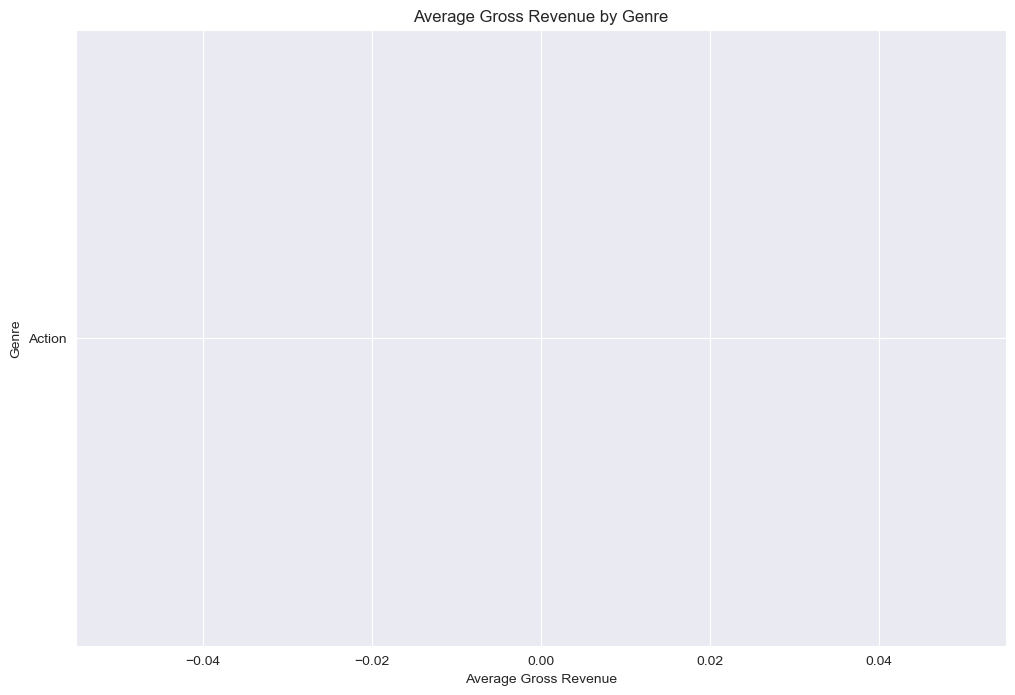

In [4]:
pip install --upgrade --force-reinstall pandas --user



### Paso 7: Documentación para GitHub

Instrucciones:
- Instalar librerías necesarias: `pandas`, `numpy`, `matplotlib`, `seaborn`, `missingno`, `plotly`, `scikit-learn`
- Seguir cada paso en el orden indicado para replicar análisis y predicciones.
